In [20]:
import numpy as np
import json
import warnings

from matplotlib import pyplot as plt


warnings.filterwarnings("ignore")

font = {'family': 'serif', 'size': 14}

plt.rc('font', **font)

size_title = 18
size_label = 16
n_pred = 2

def read_file(path):
    with open(path) as f:
        data = f.read()
        data = data.split("\n")
        data.remove('')
        data = list(map(float, data))
        return data
    
def plot_hist_two_lines(x_val1, x_val2, title, xlabel, ylabel, leg):

    plt.figure(figsize=(6, 6))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.plot(x_pos, x_val2, 'b')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.legend(leg)
    plt.grid(True)
    plt.show()


def plot_hist_three_lines(x_val1, x_val2, x_val3, title, xlabel, ylabel, leg):

    plt.figure(figsize=(6, 6))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.plot(x_pos, x_val2, 'b')
    plt.plot(x_pos, x_val3, 'c')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.legend(leg)
    plt.grid(True)
    plt.show()
    
def extract_precision(precision_path):
    #abs_precision = list()
    top1_compatible_precision = list()
    top2_compatible_precision = list()
    top3_compatible_precision = list()
    with open(precision_path) as f:
        data = f.read()
        data = data.split("\n")
        data.remove('')
        
        for row in data:
            row = row.split('\n')
            row = row[0].split(' ')
            row = list(map(float, row))
            #abs_precision.append(row[0])
            top1_compatible_precision.append(row[0])
            top2_compatible_precision.append(row[1])
            top3_compatible_precision.append(row[2])
    return top1_compatible_precision, top2_compatible_precision, top3_compatible_precision

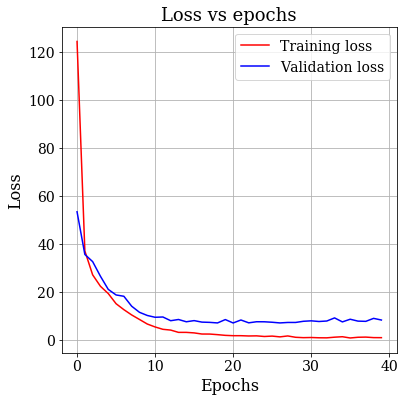

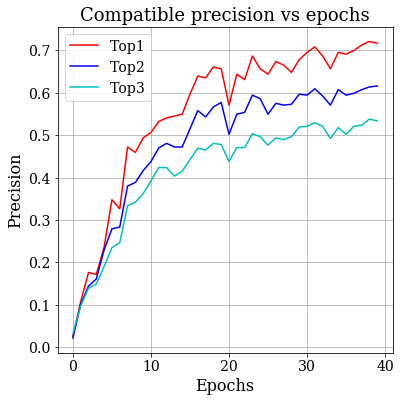

In [21]:
tr_loss_path = 'data/rnn_custom_loss/train_loss.txt'
val_loss_path = 'data/rnn_custom_loss/validation_loss.txt'
precision_path = 'data/rnn_custom_loss/precision.txt'

#Training loss
tr_loss = read_file(tr_loss_path)
#Test loss
te_loss = read_file(val_loss_path)

plot_hist_two_lines(tr_loss, te_loss, "Loss vs epochs", "Epochs", "Loss", ['Training loss', 'Validation loss'])

top1_p, top2_p, top3_p = extract_precision(precision_path)
plot_hist_three_lines(top1_p, top2_p, top3_p, "Compatible precision vs epochs", "Epochs", "Precision", ['Top1', 'Top2', 'Top3'])

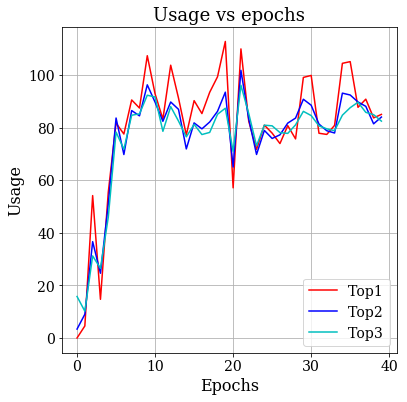

In [22]:
usage_path = 'data/rnn_custom_loss/usage_weights.txt'

top1_p, top2_p, top3_p = extract_precision(usage_path)
plot_hist_three_lines(top1_p, top2_p, top3_p, "Usage vs epochs", "Epochs", "Usage", ['Top1', 'Top2', 'Top3'])

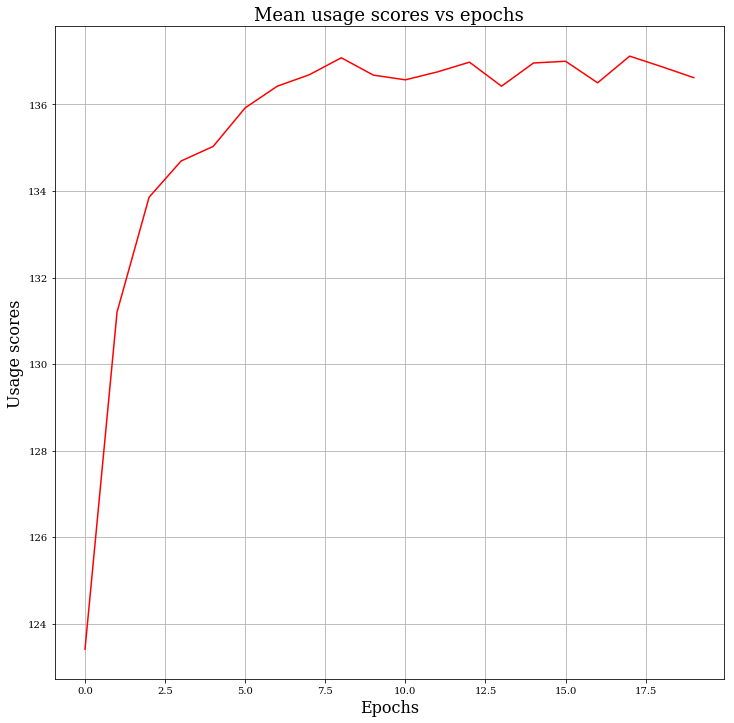

In [6]:
import json 

def plot_hist_one(x_val1, title, xlabel, ylabel):
    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()

plot_hist_one(mean_usage, "Mean usage scores vs epochs", "Epochs", "Usage scores")

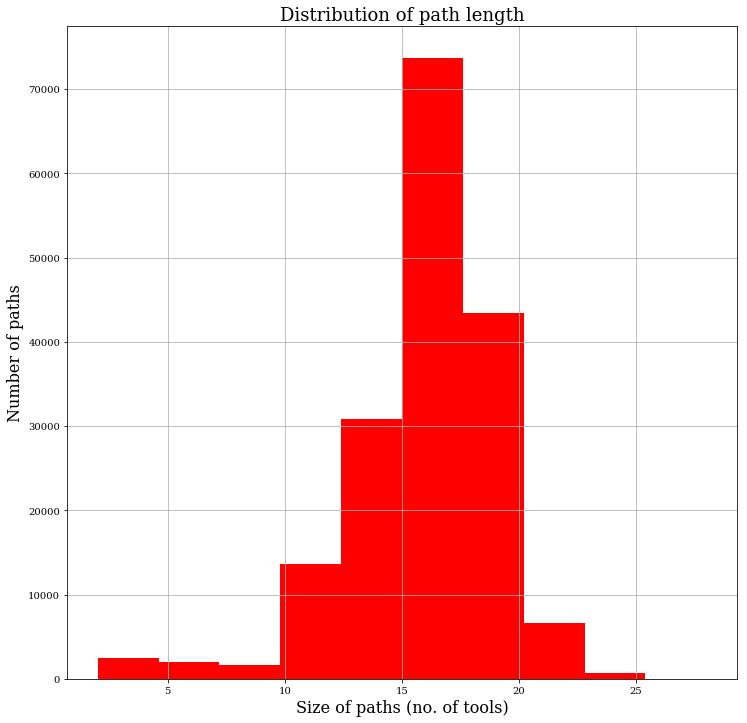

In [12]:
import json 

def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

base_path = "data/evaluate_sigmoid_512_test/"

path_dd = base_path + "paths.txt"

data_dist = read_file(path_dd)

data_dist = list(set(data_dist))

path_length = list()

for item in data_dist:
    path_length.append(len(item.split(",")))

def plot_hist_dist(x_val1, title, xlabel, ylabel):

    plt.figure(figsize=(12, 12))
    #x_pos = np.arange(len(x_val1))
    plt.hist(x_val1, color='r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()
 
plot_hist_dist(path_length, "Distribution of path length", "Size of paths (no. of tools)", "Number of paths")



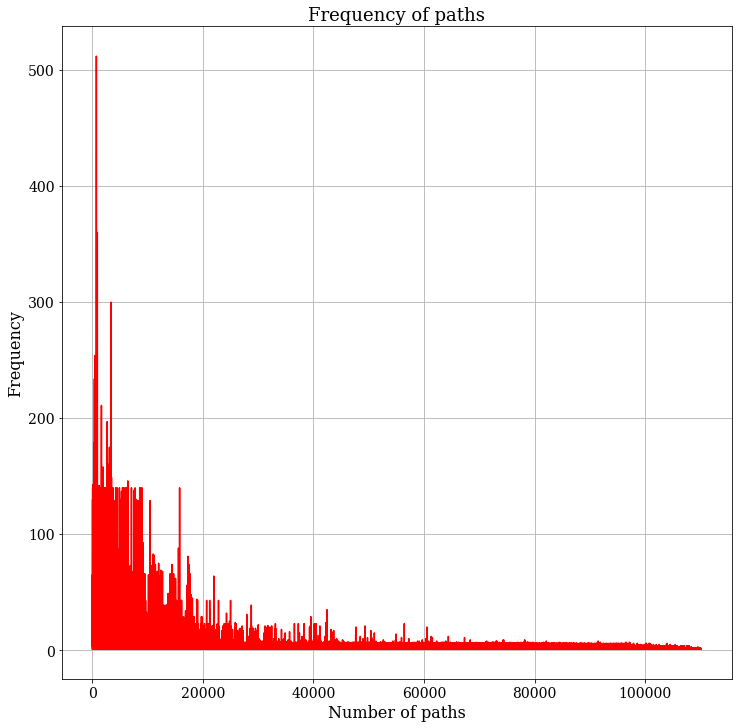

In [26]:
path_freq = read_file("data/for_plots/frequency_paths.txt")

path_freq_values = list()
for item in path_freq:
    freq = path_freq[item]
    path_freq_values.append(freq)
plot_hist_one(path_freq_values, "Frequency of paths", "Number of paths", "Frequency")

AttributeError: 'NoneType' object has no attribute 'update'

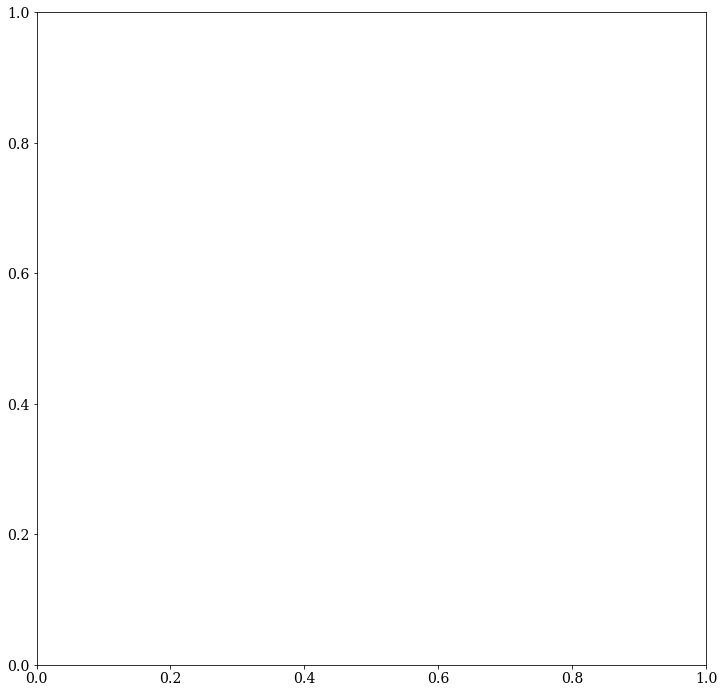

In [32]:


def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

def plot_hist_two(x_val1, title, xlabel, ylabel):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.hist(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()

path_tr_data = read_file("data/for_plots/train_paths_dict.txt")
tr_paths_length = dict()
tr_labels_length = dict()
for item in path_tr_data:
    path = item
    labels = path_tr_data[item]
    
    path_len = len(path.split(","))
    labels_len = len(labels.split(","))
    
    if path_len in tr_paths_length:
        tr_paths_length[path_len] += 1
    else:
        tr_paths_length[path_len] = 1
        
    if labels_len in tr_labels_length:
        tr_labels_length[labels_len] += 1
    else:
        tr_labels_length[labels_len] = 1
        
plot_hist_two(list(tr_paths_length.values()), "Size of paths", "Size (number of tools)", "Number of paths")
plot_hist_two(list(tr_labels_length.values()), "Size of labels", "Size (number of tools)", "Number of paths")
    

In [30]:
tr_labels_length

{2: 58452,
 1: 82872,
 3: 15155,
 4: 6041,
 5: 2051,
 7: 175,
 6: 275,
 8: 86,
 9: 32,
 11: 1,
 10: 5,
 19: 1,
 14: 2,
 13: 1,
 12: 1}